<a href="https://colab.research.google.com/github/yurigalindo/LayerReweightingToy/blob/main/3D_toy_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from toy_3d import experiment

{'LLR': tensor(0.9908), 'before': tensor(0.5855), 'random': tensor(1.)}

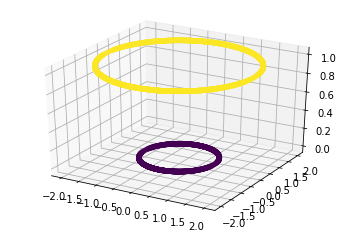

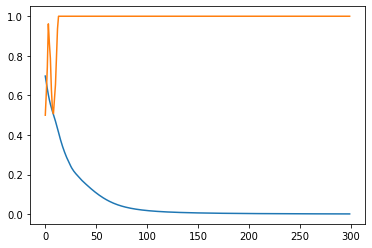

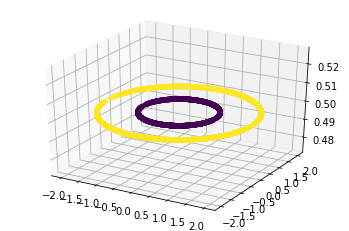

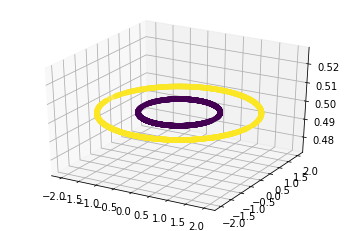

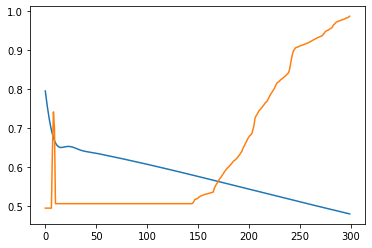

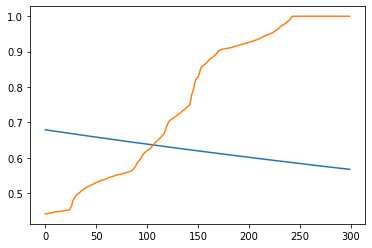

In [ ]:
experiment(512,16,300,verbose=True,exp="mid")

{'LLR': tensor(0.5048), 'before': tensor(0.4952), 'random': tensor(0.7940)}

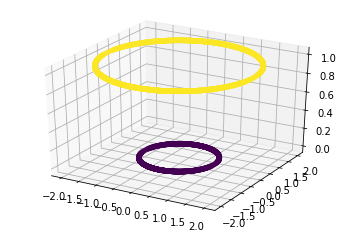

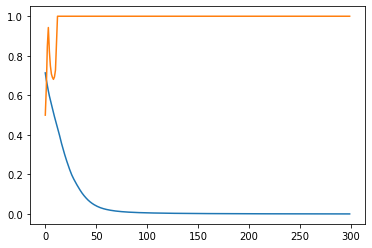

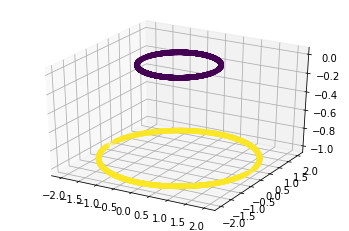

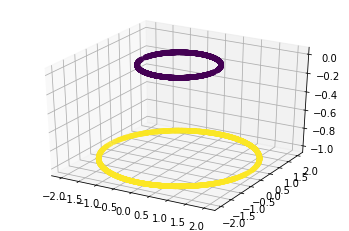

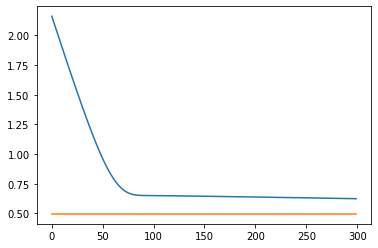

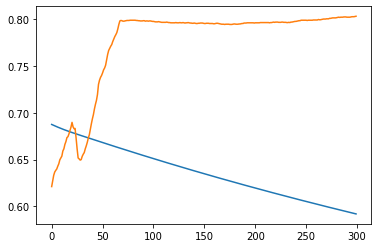

In [ ]:
experiment(512,16,300,verbose=True,exp="reverse")

{'LLR': tensor(0.7530), 'before': tensor(0.5698), 'random': tensor(0.8560)}

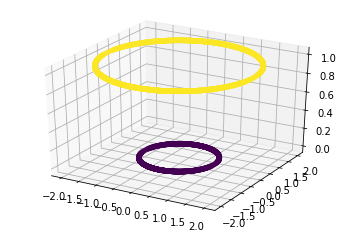

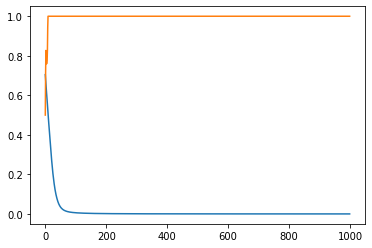

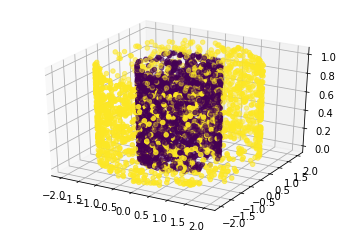

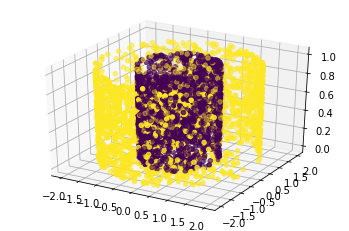

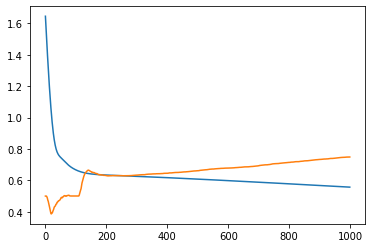

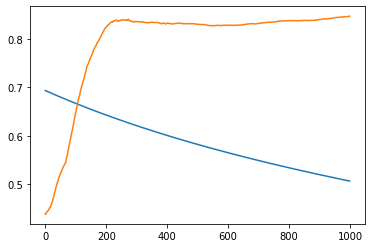

In [ ]:
experiment(512,16,1000,verbose=True,exp="rand")

{'LLR': tensor(0.7380), 'before': tensor(0.4922), 'random': tensor(0.8370)}

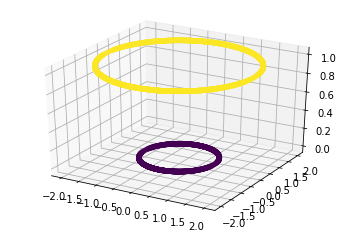

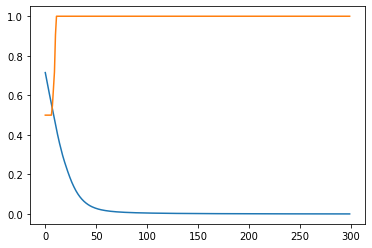

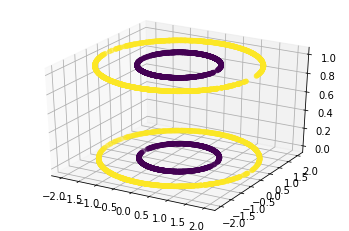

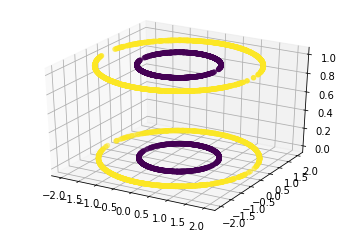

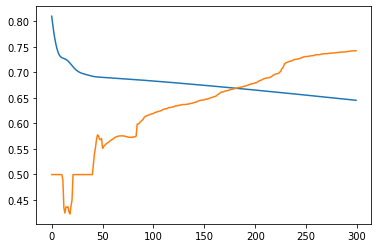

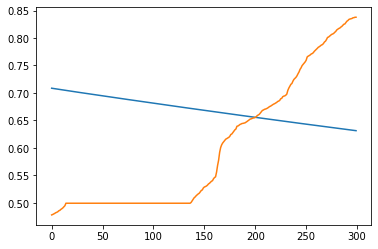

In [ ]:
experiment(512,16,300,verbose=True,exp="alternate")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.6450)}

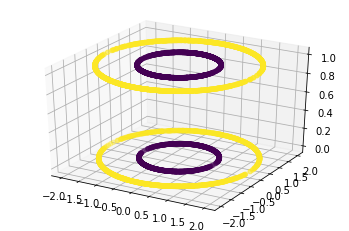

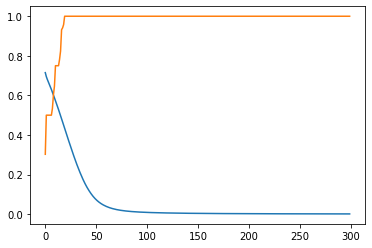

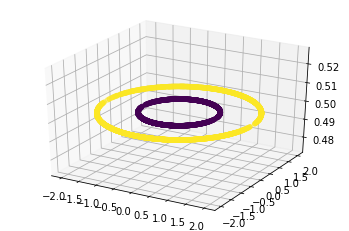

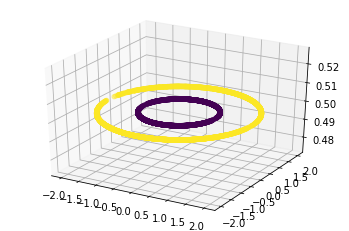

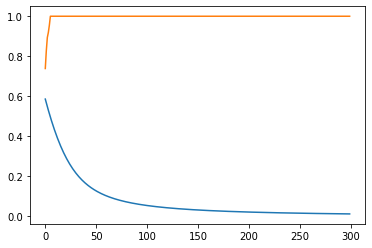

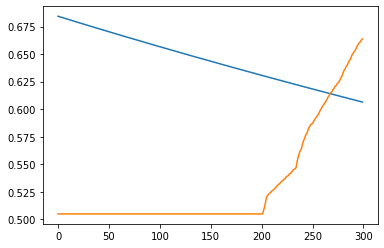

In [ ]:
experiment(512,16,300,corr=0.5,verbose=True,exp="mid")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.6275)}

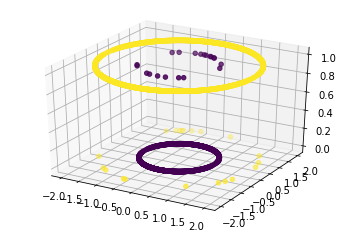

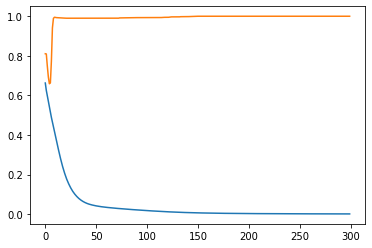

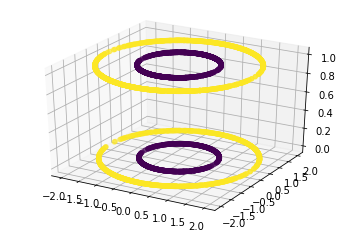

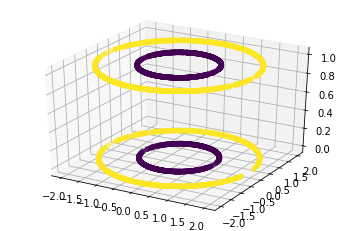

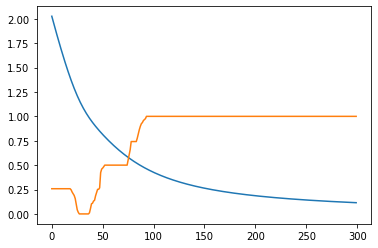

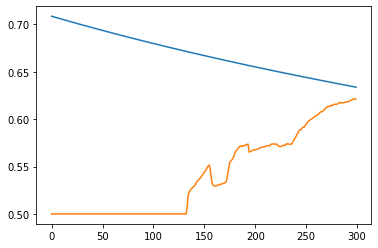

In [ ]:
experiment(512,16,300,corr=0.99,verbose=True,exp="alternate")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.5447)}

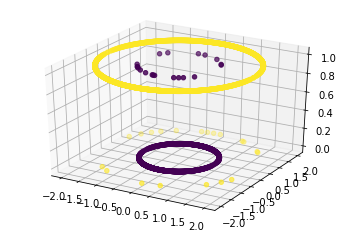

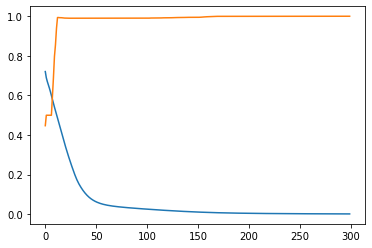

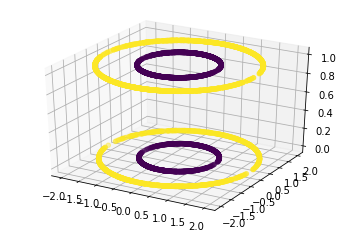

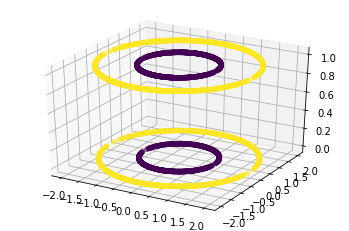

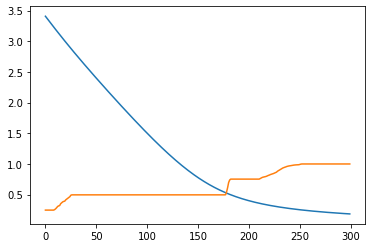

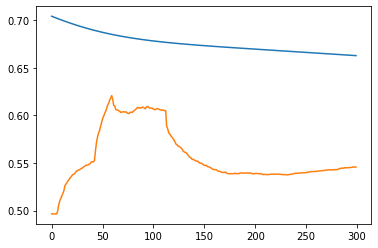

In [ ]:
experiment(512,8,300,corr=0.99,verbose=True,exp="alternate")

{'LLR': tensor(1.), 'before': tensor(0.9995), 'random': tensor(0.7632)}

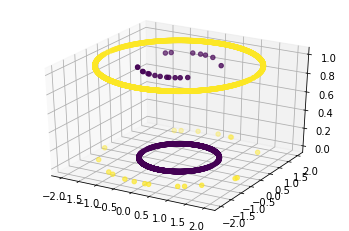

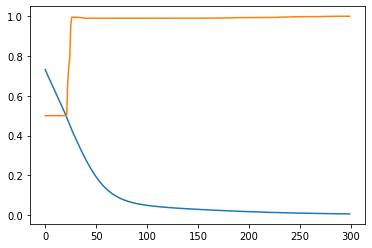

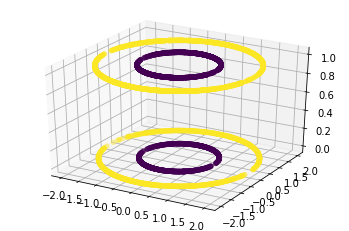

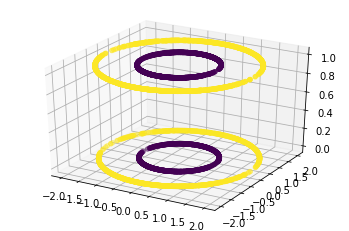

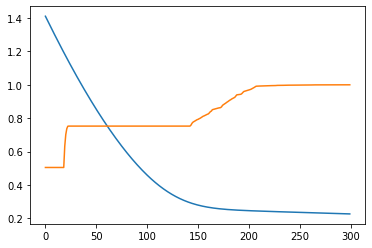

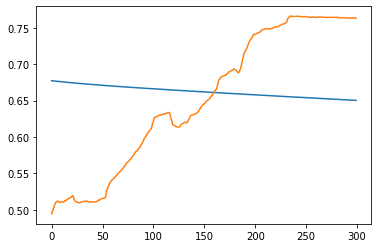

In [ ]:
experiment(512,4,300,corr=0.99,verbose=True,exp="alternate")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.4950)}

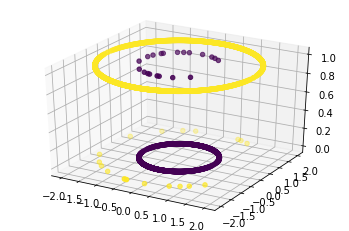

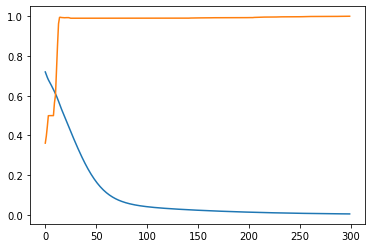

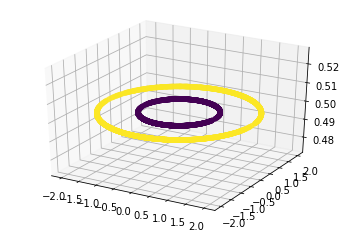

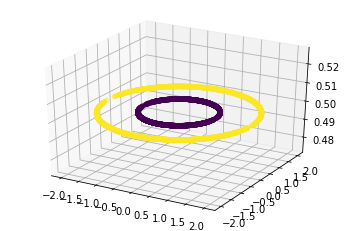

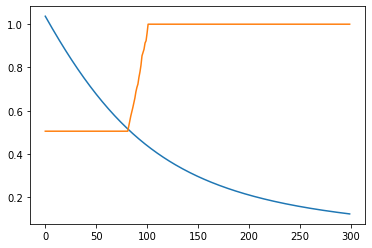

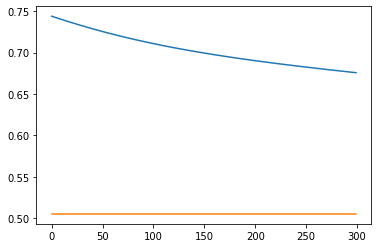

In [ ]:
experiment(512,4,300,corr=0.99,verbose=True,exp="mid")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.6513)}

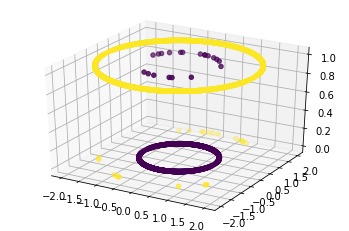

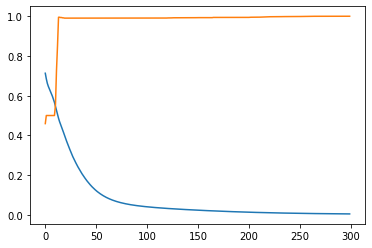

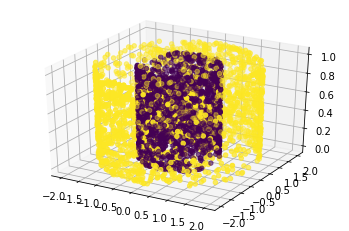

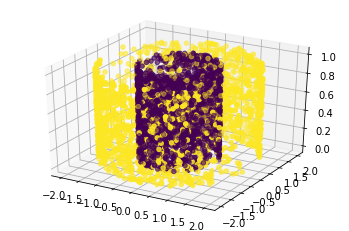

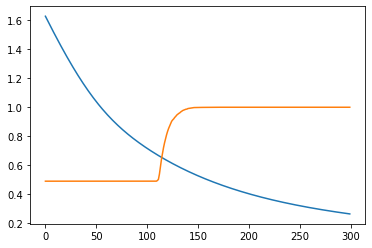

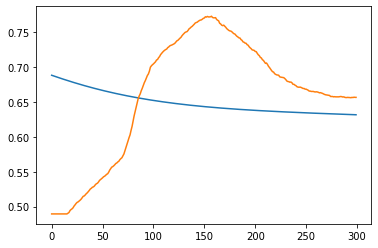

In [ ]:
experiment(512,4,300,corr=0.99,verbose=True,exp="rand")

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.5947)}

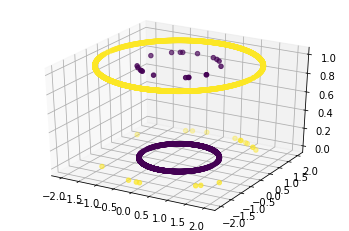

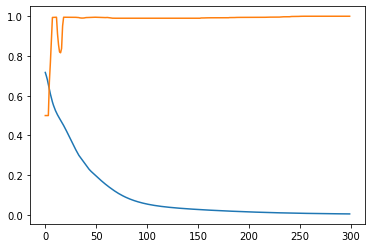

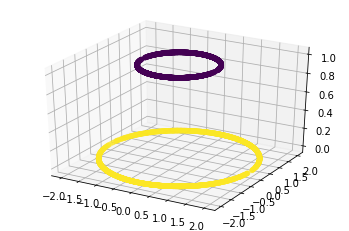

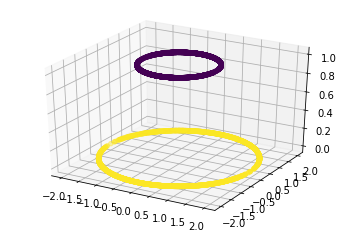

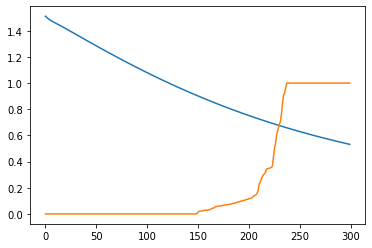

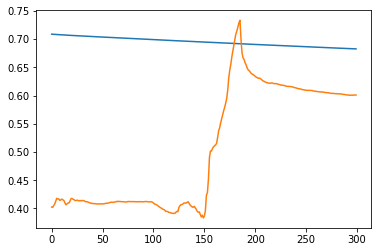

In [ ]:
experiment(512,4,300,corr=0.99,verbose=True,exp="reverse")

{'LLR': tensor(0.4605), 'before': tensor(0.8325), 'random': tensor(0.5692)}

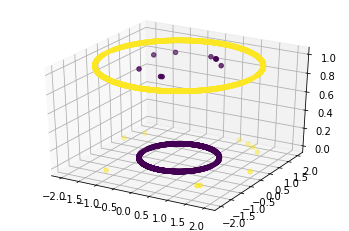

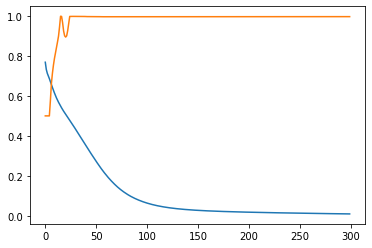

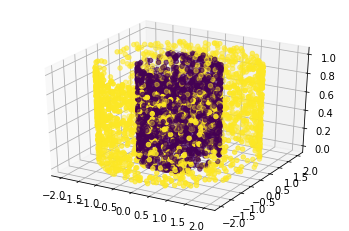

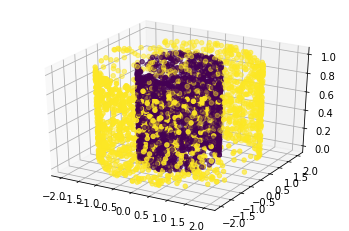

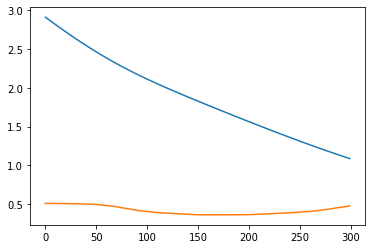

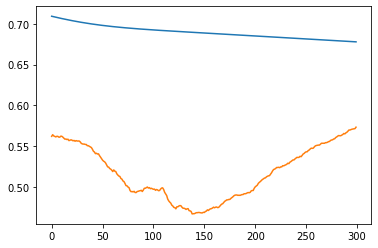

In [ ]:
experiment(512,4,300,corr=0.995,verbose=True,exp="rand")

{'LLR': tensor(0.7735), 'before': tensor(0.8160), 'random': tensor(0.6173)}

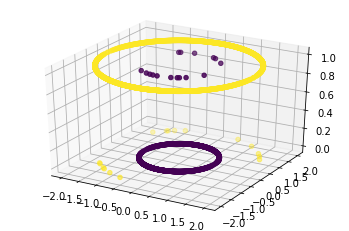

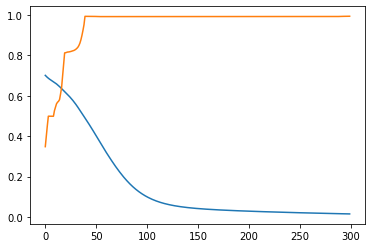

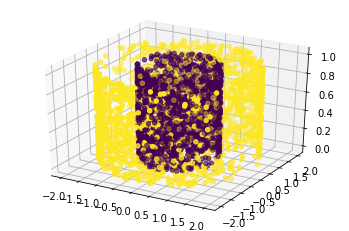

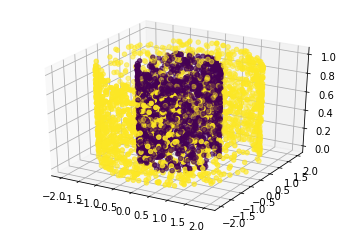

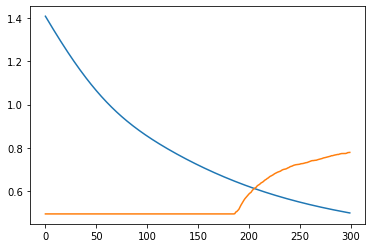

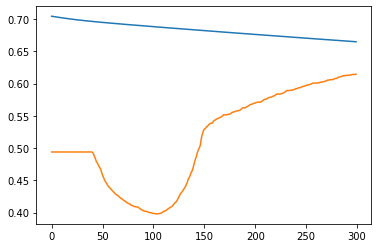

In [ ]:
experiment(128,8,300,corr=0.992,verbose=True,exp="rand")

{'LLR': tensor(0.9273), 'before': tensor(0.7870), 'random': tensor(0.6403)}

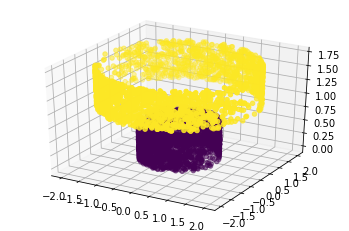

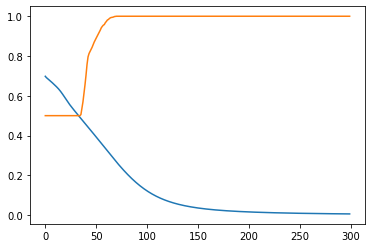

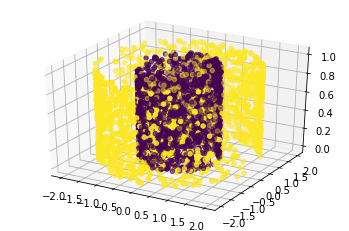

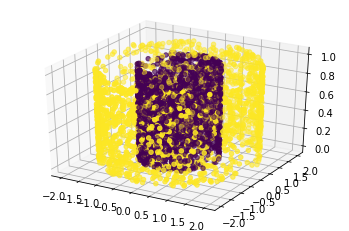

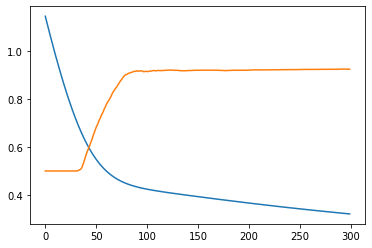

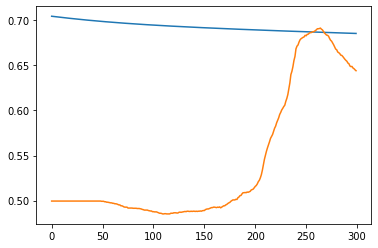

In [ ]:
experiment(256,4,300,corr=1,noise=0.7,verbose=True,exp="rand")

In [ ]:
import pandas as pd
def grid_noise(noise_min,noise_max,exp,points=10,exp_times=5):
  step = int(noise_max-noise_min)
  experiments = []
  for noise in range(int(noise_min*points),int(noise_max*points),step):
    noise = noise/points
    agg = None
    for _ in range(exp_times):
      result = experiment(512,4,exp=exp,noise=noise,corr=1)
      if agg is None:
        agg = result
      else:
        for k,v in result.items():
          agg[k]+=v # aggregate results for mean
    for k in agg:
      agg[k] /= exp_times
    agg.update({'noise':noise})
    experiments.append(agg)
  return pd.DataFrame(experiments)

In [ ]:
df = grid_noise(0.1,1.1,exp="rand")
df

,before,LLR,random,noise
0,tensor(0.6029),tensor(0.5765),tensor(0.5994),0.1
1,tensor(0.5855),tensor(0.5856),tensor(0.5469),0.2
2,tensor(0.6317),tensor(0.6453),tensor(0.5811),0.3
3,tensor(0.6339),tensor(0.6257),tensor(0.6185),0.4
4,tensor(0.6704),tensor(0.6230),tensor(0.6138),0.5
5,tensor(0.6934),tensor(0.7122),tensor(0.6337),0.6
6,tensor(0.7478),tensor(0.7545),tensor(0.5340),0.7
7,tensor(0.8047),tensor(0.7926),tensor(0.5957),0.8
8,tensor(0.8684),tensor(0.8497),tensor(0.5681),0.9
9,tensor(0.9038),tensor(0.8868),tensor(0.5416),1.0


In [ ]:
experiment(256,4,corr=1,noise=0.2,exp="reverse",verbose=True)

{'LLR': tensor(1.), 'before': tensor(1.), 'random': tensor(0.7028)}

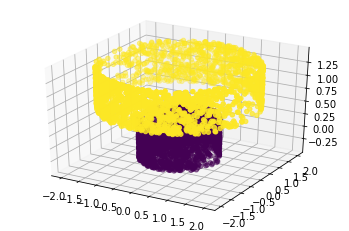

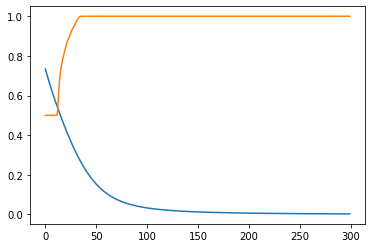

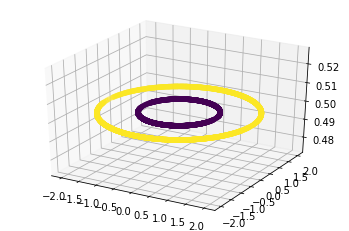

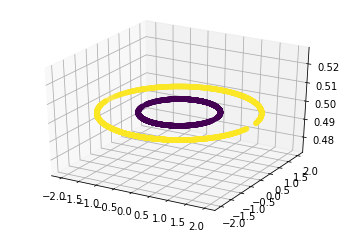

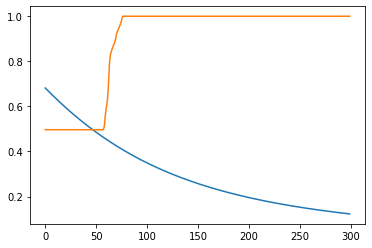

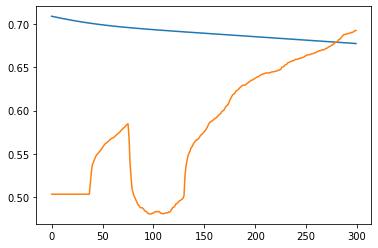

In [ ]:
experiment(512,4,corr=1,noise=0.8,exp="mid",verbose=True)

In [ ]:
df = grid_noise(0.1,1.1,exp="reverse")
df

,before,LLR,random,noise
0,tensor(0.2027),tensor(0.7972),tensor(0.6829),0.1
1,tensor(0.0992),tensor(0.9008),tensor(0.6395),0.2
2,tensor(0.3014),tensor(0.6557),tensor(0.5835),0.3
3,tensor(0.2018),tensor(0.8476),tensor(0.7574),0.4
4,tensor(0.),tensor(0.8372),tensor(0.6079),0.5
5,tensor(0.),tensor(0.7004),tensor(0.6591),0.6
6,tensor(0.1015),tensor(0.8698),tensor(0.5855),0.7
7,tensor(0.0989),tensor(0.8453),tensor(0.6947),0.8
8,tensor(0.3489),tensor(0.7001),tensor(0.6556),0.9
9,tensor(0.4780),tensor(0.6122),tensor(0.6077),1.0


In [ ]:
df = grid_noise(0.1,1.1,exp="alternate")
df

,before,LLR,random,noise
0,tensor(0.6007),tensor(0.6035),tensor(0.6066),0.1
1,tensor(0.6408),tensor(0.6441),tensor(0.6615),0.2
2,tensor(0.5473),tensor(0.5799),tensor(0.5502),0.3
3,tensor(0.5470),tensor(0.6051),tensor(0.5090),0.4
4,tensor(0.5027),tensor(0.5625),tensor(0.6199),0.5
5,tensor(0.6482),tensor(0.5694),tensor(0.5859),0.6
6,tensor(0.5005),tensor(0.5088),tensor(0.6165),0.7
7,tensor(0.5879),tensor(0.5408),tensor(0.6303),0.8
8,tensor(0.5537),tensor(0.6342),tensor(0.5419),0.9
9,tensor(0.8048),tensor(0.7630),tensor(0.6276),1.0


In [ ]:
df = grid_noise(0.1,1.1,exp="mid")
df

,before,LLR,random,noise
0,tensor(0.6482),tensor(0.6478),tensor(0.5558),0.1
1,tensor(0.8001),tensor(0.7595),tensor(0.6509),0.2
2,tensor(0.7989),tensor(0.7989),tensor(0.5379),0.3
3,tensor(0.9018),tensor(0.7779),tensor(0.5452),0.4
4,tensor(0.7995),tensor(0.8019),tensor(0.6346),0.5
5,tensor(0.7010),tensor(0.7434),tensor(0.6180),0.6
6,tensor(0.7990),tensor(0.8009),tensor(0.5632),0.7
7,tensor(0.7990),tensor(0.8997),tensor(0.6075),0.8
8,tensor(1.),tensor(1.),tensor(0.6398),0.9
9,tensor(1.),tensor(0.8004),tensor(0.5177),1.0


{'LLR': tensor(0.9398), 'before': tensor(0.8255), 'random': tensor(0.5353)}

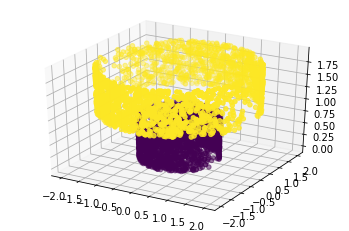

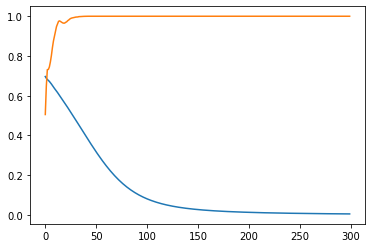

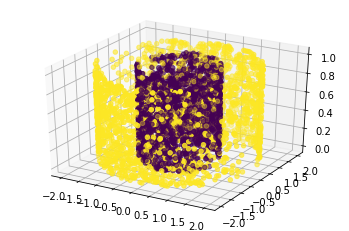

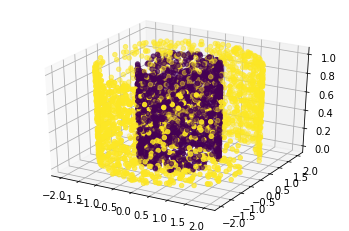

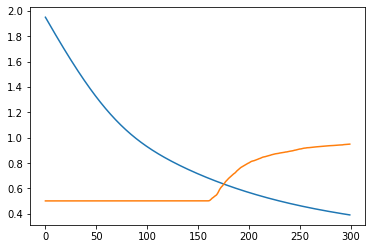

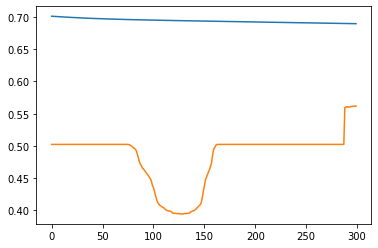

In [ ]:
experiment(256,4,300,corr=1,noise=0.9,verbose=True,exp="rand")

{'LLR': tensor(0.8457), 'before': tensor(0.4958), 'random': tensor(0.8052)}

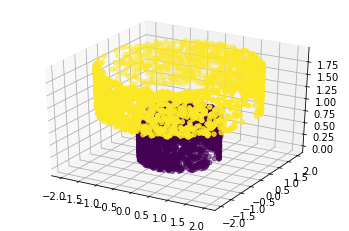

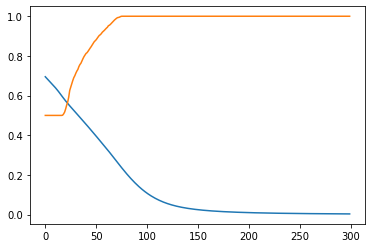

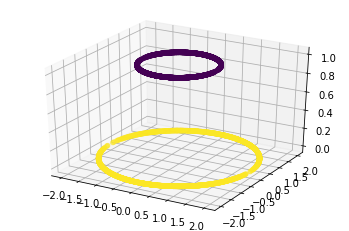

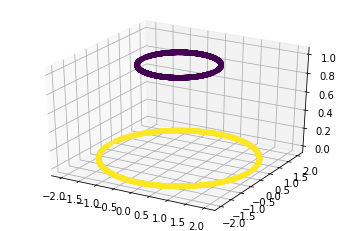

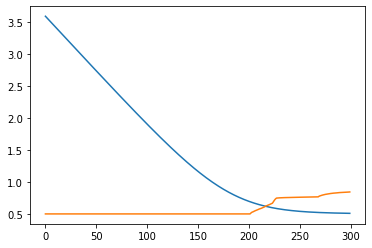

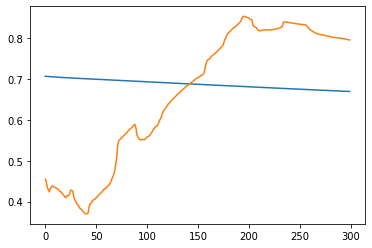

In [ ]:
experiment(256,4,300,corr=1,noise=0.9,verbose=True,exp="reverse")

In [ ]:
from toy_3d import grid_nodes

In [ ]:
df = grid_nodes(16,256,4,16,exp="mid")
df

,before,LLR,random,hidden,bottle
0,tensor(0.7501),tensor(0.8437),tensor(0.6090),16,4
1,tensor(0.8898),tensor(0.8337),tensor(0.5698),16,6
2,tensor(0.7971),tensor(0.8059),tensor(0.6262),16,8
3,tensor(0.9913),tensor(0.9435),tensor(0.6078),16,10
4,tensor(0.9330),tensor(0.9550),tensor(0.7177),16,12
5,tensor(0.8995),tensor(0.9497),tensor(0.8547),16,14
6,tensor(1.),tensor(0.8884),tensor(0.6097),64,4
7,tensor(1.),tensor(0.9979),tensor(0.5743),64,6
8,tensor(1.),tensor(1.),tensor(0.6595),64,8
9,tensor(1.),tensor(1.),tensor(0.6363),64,10


In [ ]:
df['diff'] = df['LLR'] - df['before']

In [ ]:
df.sort_values('diff',ascending=False)

,before,LLR,random,hidden,bottle,diff
0,tensor(0.7501),tensor(0.8437),tensor(0.6090),16,4,tensor(0.0936)
5,tensor(0.8995),tensor(0.9497),tensor(0.8547),16,14,tensor(0.0502)
24,tensor(0.8081),tensor(0.8490),tensor(0.5853),208,4,tensor(0.0408)
4,tensor(0.9330),tensor(0.9550),tensor(0.7177),16,12,tensor(0.0221)
25,tensor(0.9026),tensor(0.9224),tensor(0.6029),208,6,tensor(0.0198)
12,tensor(0.9004),tensor(0.9105),tensor(0.5356),112,4,tensor(0.0100)
2,tensor(0.7971),tensor(0.8059),tensor(0.6262),16,8,tensor(0.0088)
26,tensor(0.9260),tensor(0.9294),tensor(0.6443),208,8,tensor(0.0034)
16,tensor(1.),tensor(1.),tensor(0.7119),112,12,tensor(0.)
28,tensor(1.),tensor(1.),tensor(0.7599),208,12,tensor(0.)
